In [3]:
import pandas as pd

basketball_stats=pd.read_csv('../../data/basketball/stats2016.csv', sep=';')
basketball_stats.head()
basketball_stats.shape

(471, 30)

In this step we sort by MP and then only take the top 100 in minutes played.  We do this to avoid looking at a lot of players who didn't get much playing time.  

In [4]:
basketball_stats=basketball_stats.sort('MP', ascending=False)
basketball_stats=basketball_stats[0:100]

/home/bnorthan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Now we use our group by function to get players grouped by position. 

In [5]:
# group by position
grouped_stats=basketball_stats.groupby('Pos')
# aggregate using the mean
grouped_stats=grouped_stats.mean()
grouped_stats

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
C,230.000000,26.733333,48.800000,48.200000,32.186667,6.353333,12.413333,0.526667,0.186667,0.573333,...,0.691067,2.893333,7.246667,10.146667,2.106667,0.860000,1.480000,2.060000,2.720000,16.086667
PF,186.000000,26.733333,48.400000,45.000000,32.613333,6.446667,13.540000,0.477867,0.993333,2.706667,...,0.759400,1.866667,6.260000,8.133333,2.540000,1.066667,1.013333,1.966667,2.386667,17.120000
PG,275.608696,26.347826,44.217391,43.304348,32.791304,6.186957,14.386957,0.427174,1.473913,4.104348,...,0.797739,0.734783,3.521739,4.243478,6.830435,1.504348,0.326087,2.843478,2.213043,17.208696
SF,145.954545,27.181818,46.363636,44.045455,32.622727,5.518182,12.277273,0.447318,1.463636,4.072727,...,0.777409,1.086364,4.540909,5.622727,2.600000,1.145455,0.445455,1.731818,2.168182,15.422727
SG,204.840000,26.120000,48.720000,46.520000,33.484000,5.972000,13.672000,0.435160,1.700000,4.708000,...,0.810440,0.668000,3.092000,3.748000,3.344000,1.116000,0.380000,2.072000,2.212000,16.672000


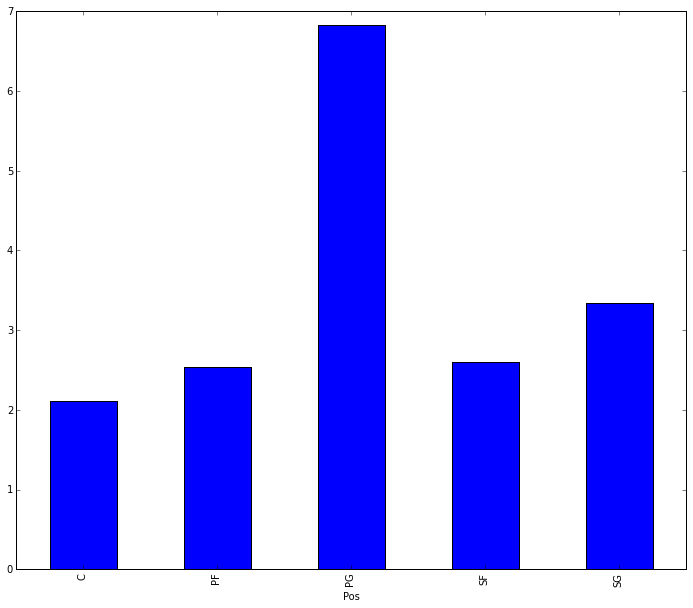

In [10]:
%matplotlib inline
plot=grouped_stats['AST'].plot(kind='bar', figsize=(12,10))
plot.get_figure().show()

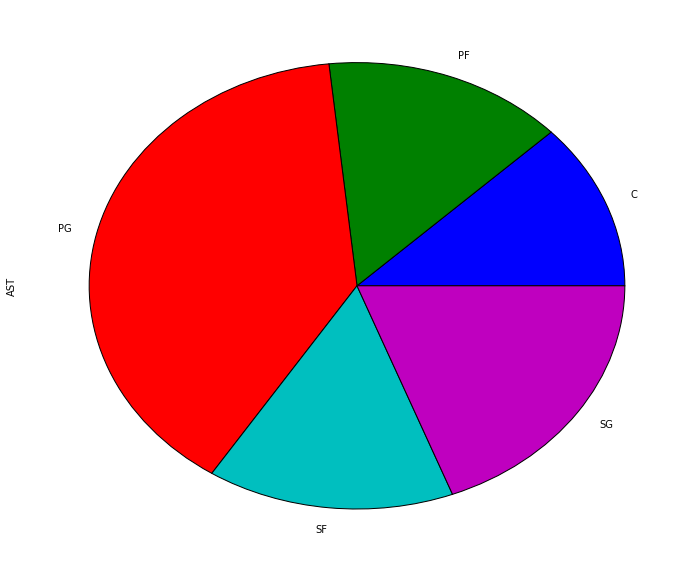

In [9]:
grouped_stats['AST'].plot(kind='pie',figsize=(12,10))